In [1]:
import pandas as pd
df = pd.DataFrame({'Name': ['Alice', 'Billy', 'Cindy', 'Dicky', 'Edwin', 'Felix'], 'Age': [15, 12, 13, 16, 14, 19]})
print(df)

    Name  Age
0  Alice   15
1  Billy   12
2  Cindy   13
3  Dicky   16
4  Edwin   14
5  Felix   19


In [3]:
import pandas as pd
df = pd.DataFrame({"Commercials Watched": [10, 15, 7, 2, 16], "Product Purchases": [13, 0, 7, 4, 11]})
print(df)

   Commercials Watched  Product Purchases
0                   10                 13
1                   15                  0
2                    7                  7
3                    2                  4
4                   16                 11


In [4]:
import pandas as pd
df = pd.DataFrame({"Commercials Watched": [10, 15, 7, 2, 16], "Product Purchases": [13, 0, 7, 4, 11]})
print(df.cov)

<bound method DataFrame.cov of    Commercials Watched  Product Purchases
0                   10                 13
1                   15                  0
2                    7                  7
3                    2                  4
4                   16                 11>


In [5]:
df.cov()

,Commercials Watched,Product Purchases
Commercials Watched,33.50,3.25
Product Purchases,3.25,27.50


In [6]:
df.corr()

,Commercials Watched,Product Purchases
Commercials Watched,1.000000,0.107077
Product Purchases,0.107077,1.000000


ZeroR Accuracy: 0.64


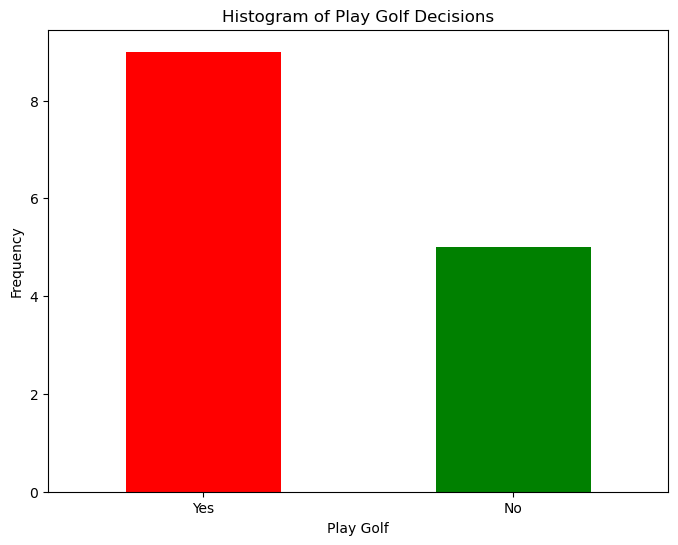

In [8]:
#Zero R
import pandas as pd
import matplotlib.pyplot as plt

# Define the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create a DataFrame
df = pd.DataFrame(data)

# ZeroR algorithm: Find the most frequent class in the target
most_frequent_class = df['Play Golf'].mode()[0]
df['Prediction_ZeroR'] = most_frequent_class

# Calculate the accuracy of ZeroR
accuracy_zeror = (df['Prediction_ZeroR'] == df['Play Golf']).mean()
print(f'ZeroR Accuracy: {accuracy_zeror:.2f}')

# Plotting the histogram for 'Play Golf'
plt.figure(figsize=(8, 6))
df['Play Golf'].value_counts().plot(kind='bar', color=['red', 'green'])
plt.title('Histogram of Play Golf Decisions')
plt.xlabel('Play Golf')
plt.ylabel('Frequency')
plt.xticks(rotation=0)
plt.show()

In [9]:
# One R
import pandas as pd
import numpy as np

# Define the dataset
data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rainy', 'Rainy', 'Rainy', 'Overcast', 'Sunny', 'Sunny', 'Rainy', 'Sunny', 'Overcast', 'Overcast', 'Rainy'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Cool', 'Cool', 'Cool', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'Normal', 'Normal', 'High', 'Normal', 'High'],
    'Windy': [False, True, False, False, False, True, True, False, False, False, True, True, False, True],
    'Play Golf': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

# Create a DataFrame
df = pd.DataFrame(data)

# Function to calculate the error for each attribute
def calculate_error(df, attribute, target):
    rules = {}
    total_error = 0

    for value in df[attribute].unique():
        most_common_class = df[df[attribute] == value][target].mode()[0]
        rules[value] = most_common_class
        error = len(df[(df[attribute] == value) & (df[target] != most_common_class)])
        total_error += error

    return total_error, rules

# OneR algorithm implementation
def one_r(df, target):
    min_error = float('inf')
    best_attribute = None
    best_rules = None

    for attribute in df.columns.drop(target):
        error, rules = calculate_error(df, attribute, target)
        if error < min_error:
            min_error = error
            best_attribute = attribute
            best_rules = rules

    return best_attribute, best_rules

# Apply the OneR algorithm to the dataset
target = 'Play Golf'
best_attribute, best_rules = one_r(df, target)

# Display the best attribute and the corresponding rules
print(f'Best Attribute: {best_attribute}')
print('Rules:')
for value, prediction in best_rules.items():
    print(f'If {best_attribute} is {value}, then Play Golf is {prediction}')

# Apply the learned rules to make predictions
def predict(row, attribute, rules):
    return rules[row[attribute]]

# Add a prediction column to the DataFrame
df['Prediction'] = df.apply(lambda row: predict(row, best_attribute, best_rules), axis=1)

# Calculate the accuracy
accuracy = np.mean(df['Prediction'] == df['Play Golf'])
print(f'Accuracy: {accuracy:.2f}')


Best Attribute: Outlook
Rules:
If Outlook is Sunny, then Play Golf is No
If Outlook is Overcast, then Play Golf is Yes
If Outlook is Rainy, then Play Golf is Yes
Accuracy: 0.71


In [10]:
import numpy as np

# Data
x = np.array([1, 2, 3, 4, 5])
y = np.array([18, 24, 23, 29, 36])

# Calculate components
N = len(x)
sum_x = np.sum(x)
sum_y = np.sum(y)
sum_xy = np.sum(x * y)
sum_x_squared = np.sum(x**2)

# Calculate slope (m)
m = (N * sum_xy - sum_x * sum_y) / (N * sum_x_squared - sum_x**2)

# Calculate y-intercept (b)
b = (sum_y - m * sum_x) / N

print(f"Regression line: y = {m:.1f}x + {b:.1f}")

# Optional: calculate predicted values
predicted_y = m * x + b
print("\nPredicted values:")
for i, pred in enumerate(predicted_y):
    print(f"x = {x[i]}, predicted y = {pred:.1f}")

Regression line: y = 4.1x + 13.7

Predicted values:
x = 1, predicted y = 17.8
x = 2, predicted y = 21.9
x = 3, predicted y = 26.0
x = 4, predicted y = 30.1
x = 5, predicted y = 34.2


Estimated coefficients:
m = 4.1
b = 13.7


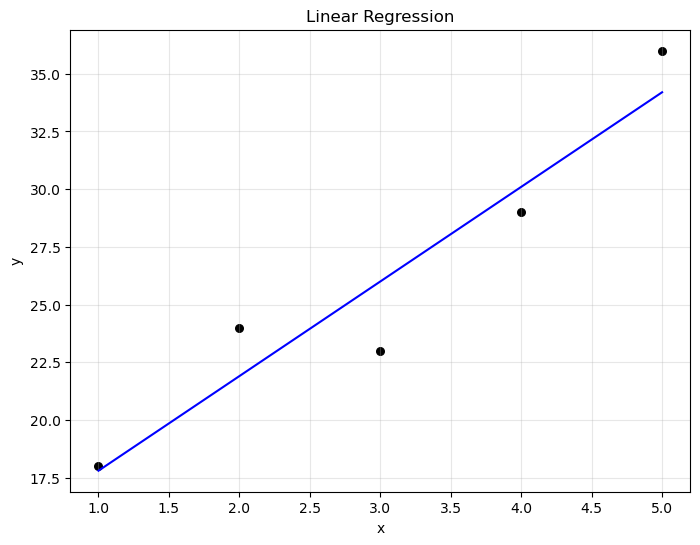

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# Data points
x = np.array([1, 2, 3, 4, 5])
y = np.array([18, 24, 23, 29, 36])

# Calculate regression coefficients
N = len(x)
m = (N * np.sum(x*y) - np.sum(x)*np.sum(y)) / (N * np.sum(x**2) - np.sum(x)**2)
b = (np.sum(y) - m*np.sum(x)) / N

# Generate points for the regression line
x_line = np.linspace(min(x), max(x), 100)
y_line = m * x_line + b

# Create the plot
plt.figure(figsize=(8, 6))

# Plot scatter points
plt.scatter(x, y, color="black", marker="o", s=30)

# Plot regression line
plt.plot(x_line, y_line, color="blue")

# Add labels and title
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression')

# Display the coefficients
print(f"Estimated coefficients:")
print(f"m = {m}")
print(f"b = {b}")

plt.grid(True, alpha=0.3)
plt.show()

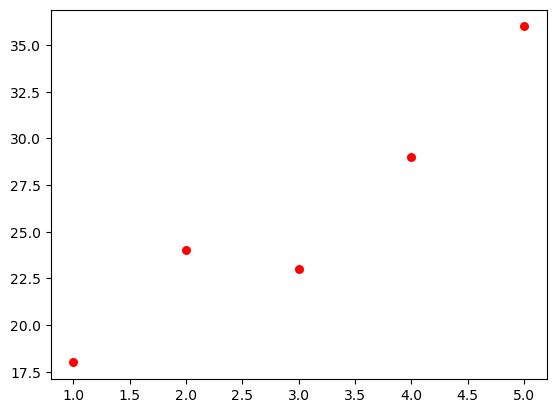

Estimated coefficients:
m = 4.1
b = 13.7


32.15

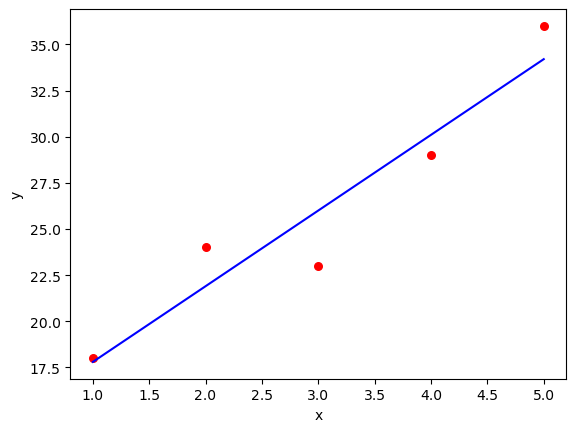

In [15]:
# Lecturer's ans
import matplotlib.pyplot as plt  # for graph plotting
import numpy as np # forming array
x = np.array([1,2,3,4,5])
y = np.array([18,24,23,29,36])
plt.scatter(x,y, color="red", marker="o", s=30)
plt.show()

n=np.size(x)
sumx=sum(x)
sumy= sum(y)
sumxx= sum(x**2)
sumxy= sum(x*y)
m=(n*sumxy-sumx*sumy)/(n*sumxx-sumx**2)
b=(sumy-m*sumx)/n
print("Estimated coefficients:")
print("m =",m)
print("b =",b)
y_fn=m*x+b
plt.scatter(x,y, color="red", marker="o", s=30)
plt.plot(x,y_fn, color="blue")
plt.xlabel('x')
plt.ylabel('y')

#interpolation
#predict the value of y for x = 4.5
y_fn=m*4.5+b
y_fn